In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, ward, complete, average
from sklearn.preprocessing import StandardScaler



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS

In [5]:
mall = pd.read_csv('/content/Mall_Customers.csv')
X = mall.iloc[:, [3, 4]].values
mall.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
mall_clust = mall[['Annual Income (k$)', 'Spending Score (1-100)']]

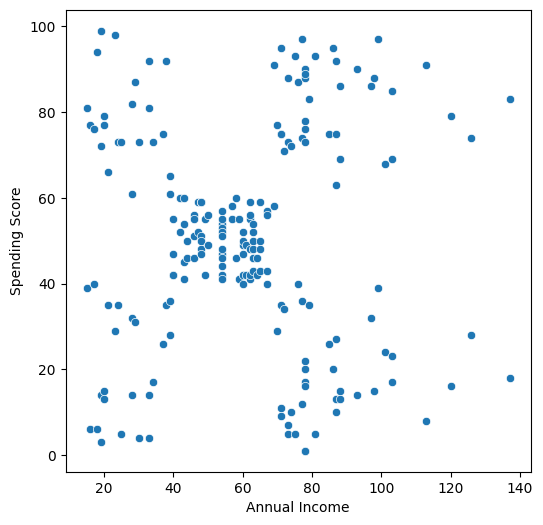

In [9]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall_clust)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Kmeans

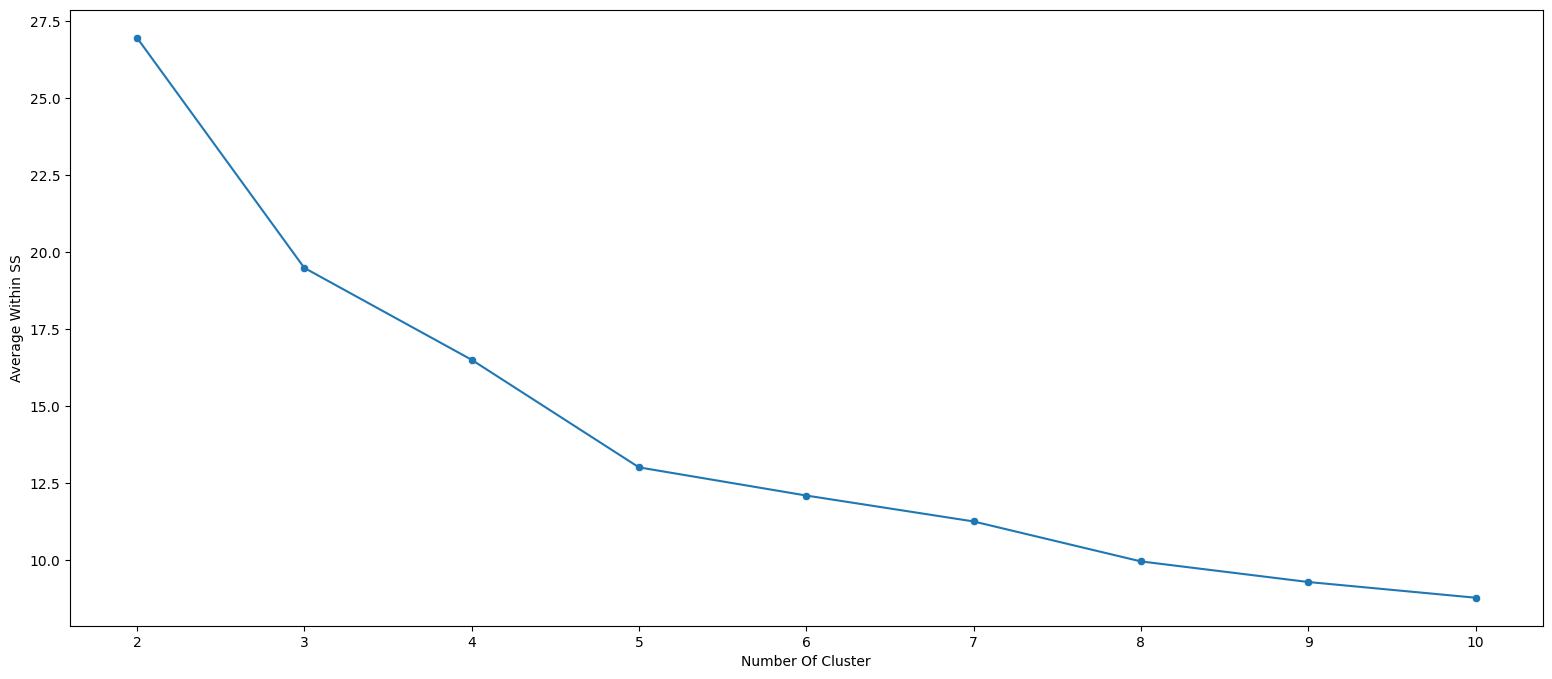

In [10]:
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters = k).fit(mall_clust) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(mall_clust, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis = 1) for D in D_k]
dist = [np.min(D, axis = 1) for D in D_k]
avg_withinSS = [sum(d)/mall_clust.shape[0] for d in dist]
plt.figure(figsize=(19, 8))
sns.lineplot(x=number_of_cluster, y=avg_withinSS)
sns.scatterplot(x=number_of_cluster, y=avg_withinSS)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.show()

In [11]:
s_score = []

number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(mall_clust)
    labels = kmeans.labels_
    s_score.append(silhouette_score(mall_clust, labels, metric = 'euclidean'))

s_score

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5270287298101395,
 0.4579252386192864,
 0.457462901394195,
 0.44760979994374317]

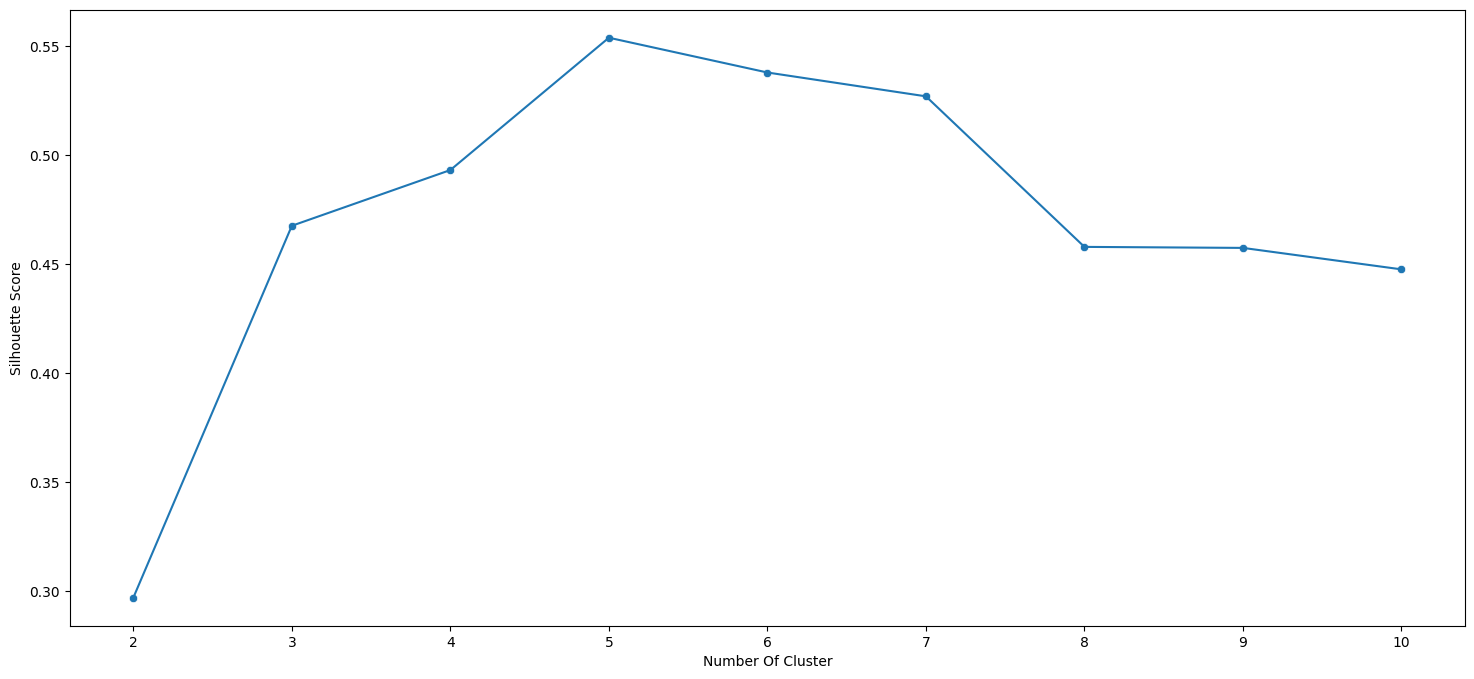

In [12]:
plt.figure(figsize=(18, 8))
sns.lineplot(x=number_of_cluster, y=s_score)
sns.scatterplot(x=number_of_cluster, y=s_score)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

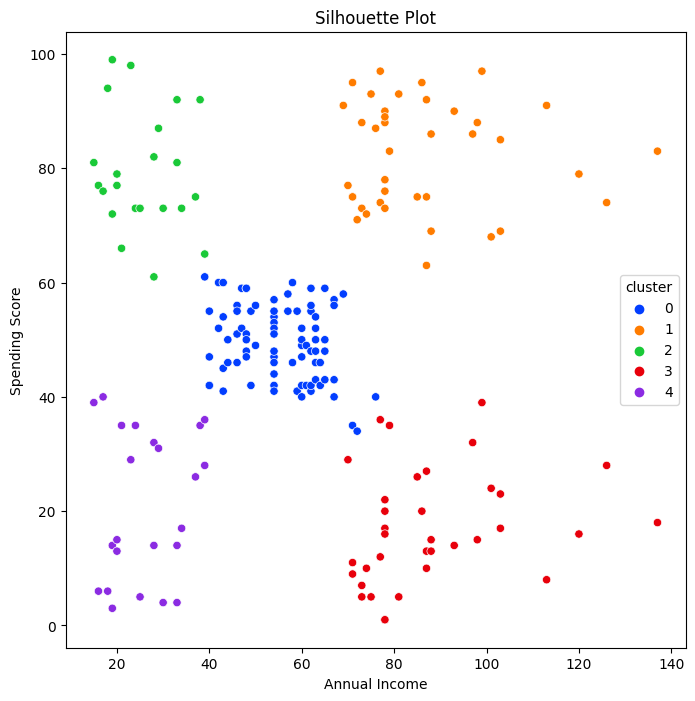

In [13]:

kmeans = KMeans(n_clusters = 5)
kmeans.fit(mall_clust)
data_mall = mall_clust.copy()
data_mall['cluster'] = kmeans.labels_
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data_mall, hue = 'cluster', palette = 'bright')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Silhouette Plot')
plt.show()

Agglomerative Clustering

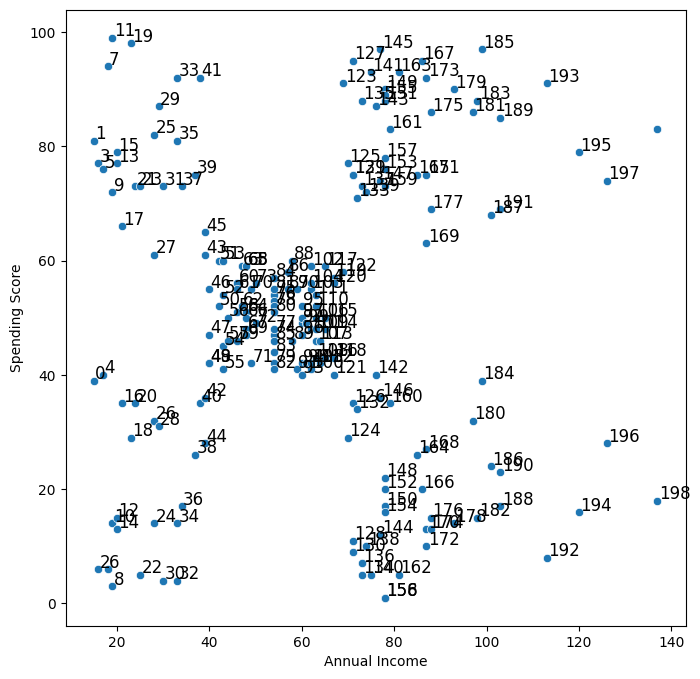

In [14]:
plt.figure(figsize=(8,8))

sns.scatterplot(
    x= 'Annual Income (k$)',
    y= 'Spending Score (1-100)',
    data= mall_clust
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

for i,txt in enumerate(range(0, mall_clust.shape[0]-1)):
    plt.annotate(txt,(mall['Annual Income (k$)'][i]+0.3, mall['Spending Score (1-100)'][i]+0.3), fontsize=12)

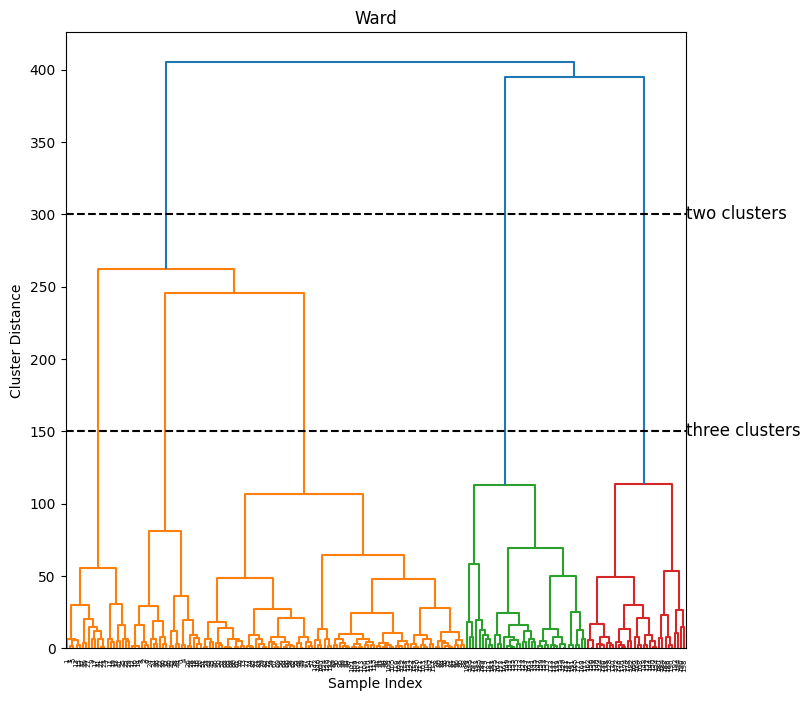

In [15]:
linkage_array = ward(mall_clust)
plt.figure(figsize = (8,8))
dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [300,300], '--', c = 'k')
ax.plot(bounds, [150,150], '--', c = 'k')

ax.text(bounds[1], 300, 'two clusters', va = 'center', fontdict = {'size': 12})
ax.text(bounds[1], 150, 'three clusters', va = 'center', fontdict = {'size': 12})

plt.title('Ward')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

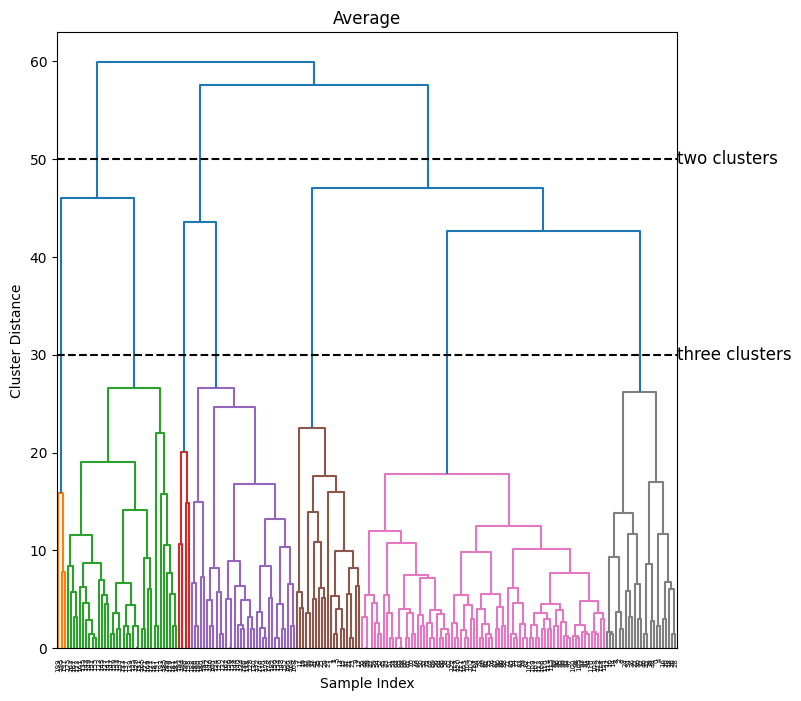

In [16]:
linkage_array = average(mall_clust)
plt.figure(figsize = (8,8))
dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [50,50], '--', c = 'k')
ax.plot(bounds, [30,30], '--', c = 'k')

ax.text(bounds[1], 50, 'two clusters', va = 'center', fontdict = {'size': 12})
ax.text(bounds[1], 30, 'three clusters', va = 'center', fontdict = {'size': 12})

plt.title('Average')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

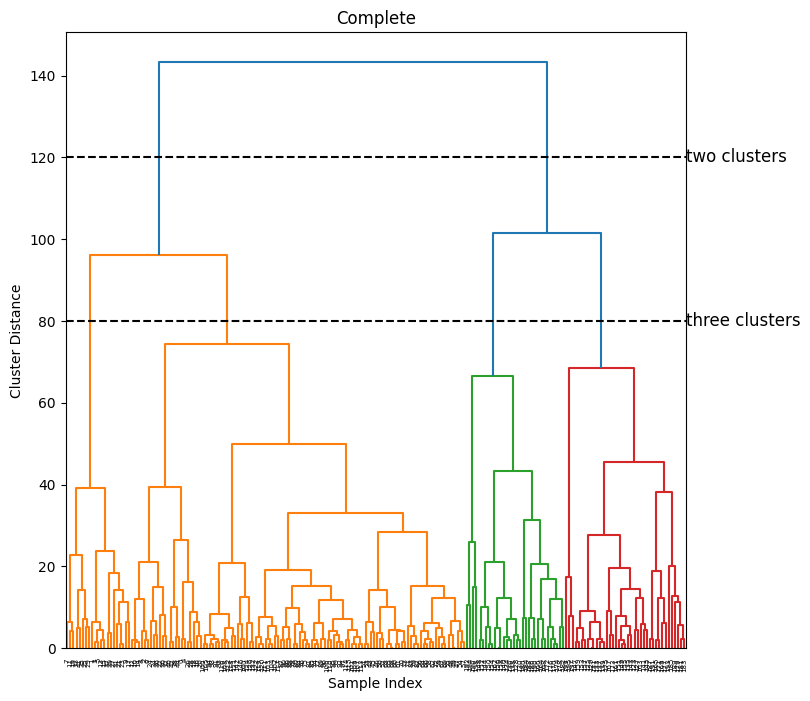

In [17]:
linkage_array = complete(mall_clust)
plt.figure(figsize = (8,8))
dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [120,120], '--', c = 'k')
ax.plot(bounds, [80,80], '--', c = 'k')

ax.text(bounds[1], 120, 'two clusters', va = 'center', fontdict = {'size': 12})
ax.text(bounds[1], 80, 'three clusters', va = 'center', fontdict = {'size': 12})

plt.title('Complete')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

Comparison of Results

In [18]:
agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
mall['ward'] = agg_ward.fit_predict(mall_clust)

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
mall['average'] = agg_ward.fit_predict(mall_clust)

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
mall['complete'] = agg_ward.fit_predict(mall_clust)

mall.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ward,average,complete
0,1,Male,19,15,39,4,1,4
1,2,Male,21,15,81,3,3,3
2,3,Female,20,16,6,4,1,4


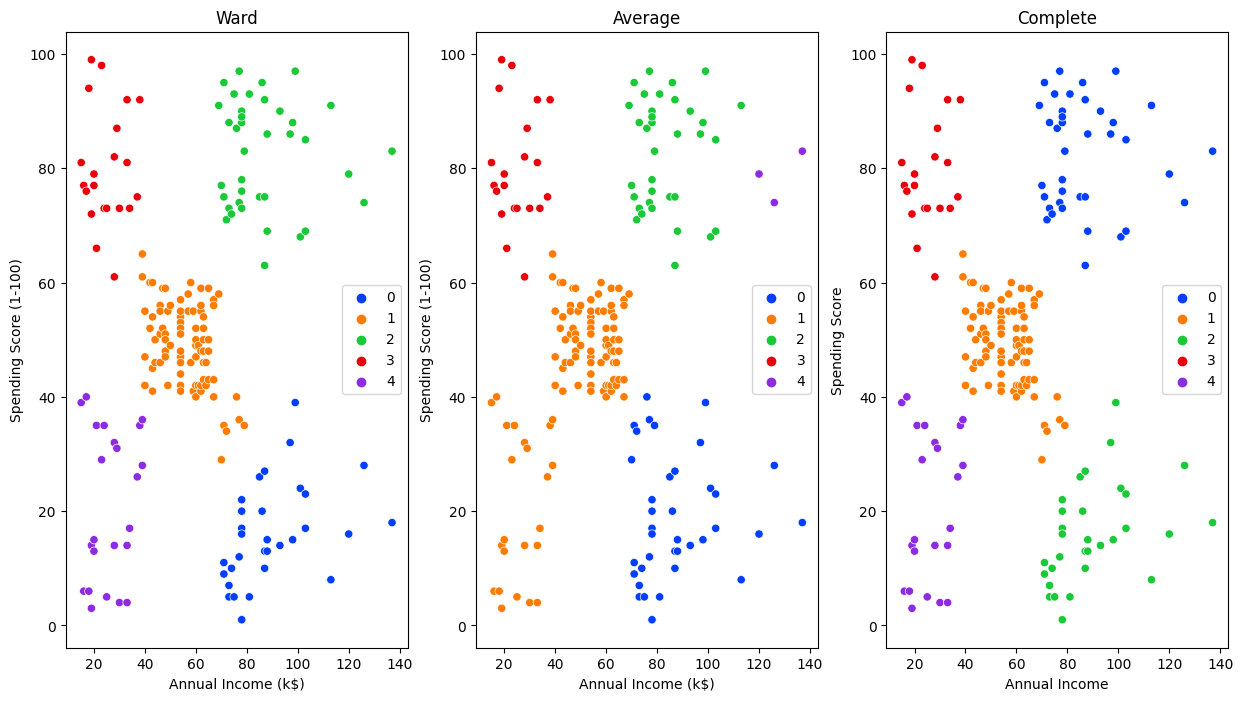

In [19]:
plt.figure(figsize = (15,8))
plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall, hue = 'ward', palette = 'bright')
plt.legend(loc = 5)
plt.title('Ward')
plt.subplot(1, 3, 2)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall, hue = 'average', palette = 'bright')
plt.legend(loc = 5)
plt.title('Average')
plt.subplot(1, 3, 3)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall, hue = 'complete', palette = 'bright')
plt.legend(loc = 5)
plt.title('Complete')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [20]:
cluster_name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple']
ward_list = ['High Income VS Low Spending', 'Medium Income VS Medium Spending', 'High Income  VS High Spending',
             'Low Income VS High Spending', 'Low Income VS Low Spending']
avg_list = ['High Income VS Low Spending', 'Medium Income VS Medium Spending', 'High Income  VS High Spending',
            'Low Income VS High Spending', 'Highest Income VS Highest Spending']
comp_list = ['High Income VS High Spending', 'Medium Income VS Medium Spending', 'High Income  VS Low Spending',
             'Low Income VS High Spending', 'Low Income VS Low Spending']
summary = pd.DataFrame({'Color': color, 'Name': cluster_name, 'Ward': ward_list,
                        'Average': avg_list, 'Complete': comp_list})
summary

,Color,Name,Ward,Average,Complete
0,Blue,Cluster 0,High Income VS Low Spending,High Income VS Low Spending,High Income VS High Spending
1,Orange,Cluster 1,Medium Income VS Medium Spending,Medium Income VS Medium Spending,Medium Income VS Medium Spending
2,Green,Cluster 2,High Income VS High Spending,High Income VS High Spending,High Income VS Low Spending
3,Red,Cluster 3,Low Income VS High Spending,Low Income VS High Spending,Low Income VS High Spending
4,Purple,Cluster 4,Low Income VS Low Spending,Highest Income VS Highest Spending,Low Income VS Low Spending


Mean Shift

Text(0.5, 1.0, 'MeanShift Model')

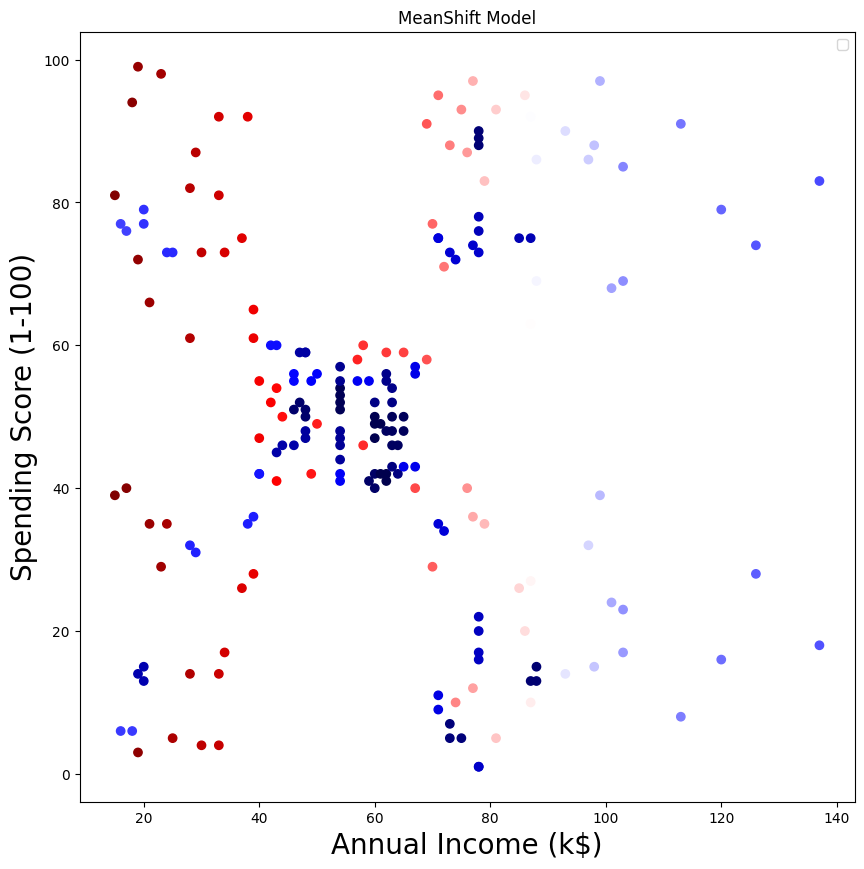

In [21]:
ms = MeanShift(bandwidth=2)
ms.fit(X)
ms_y_pred = ms.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=ms_y_pred, cmap='seismic')
plt.title("MeanShift Model")


OPTICS

Text(0.5, 1.0, 'OPTICS Model')

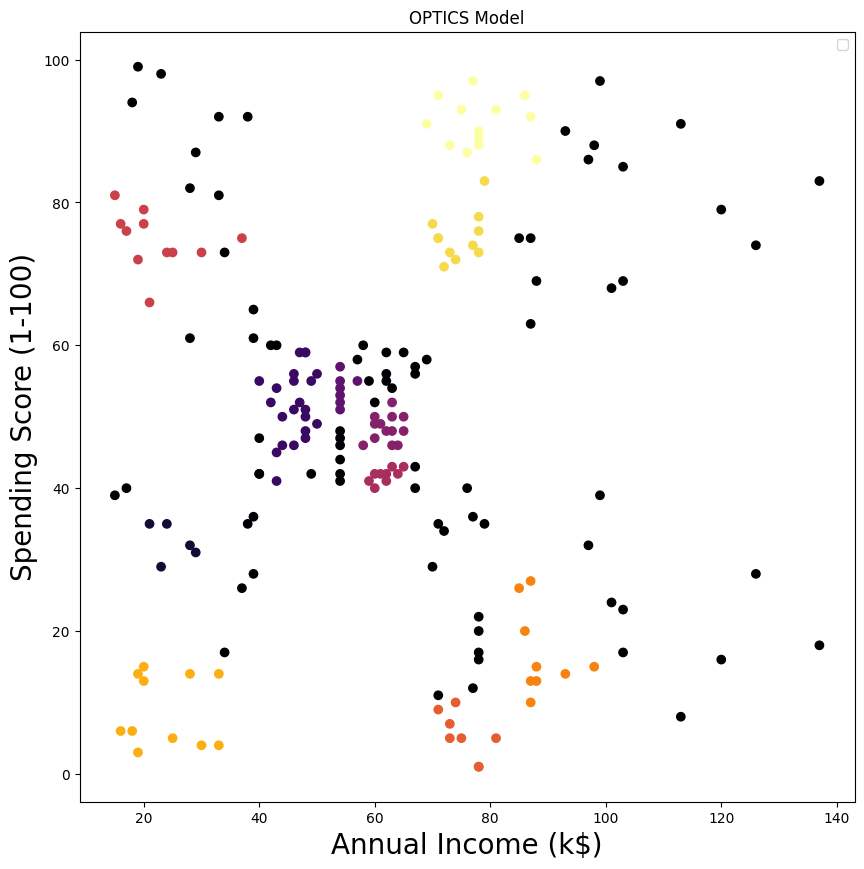

In [22]:
opt = OPTICS(min_samples=5)
opt_y_pred = opt.fit_predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=opt_y_pred, cmap='inferno')
plt.title("OPTICS Model")


Gaussian Mixture Model

Text(0.5, 1.0, 'Gaussian Mixture Model')

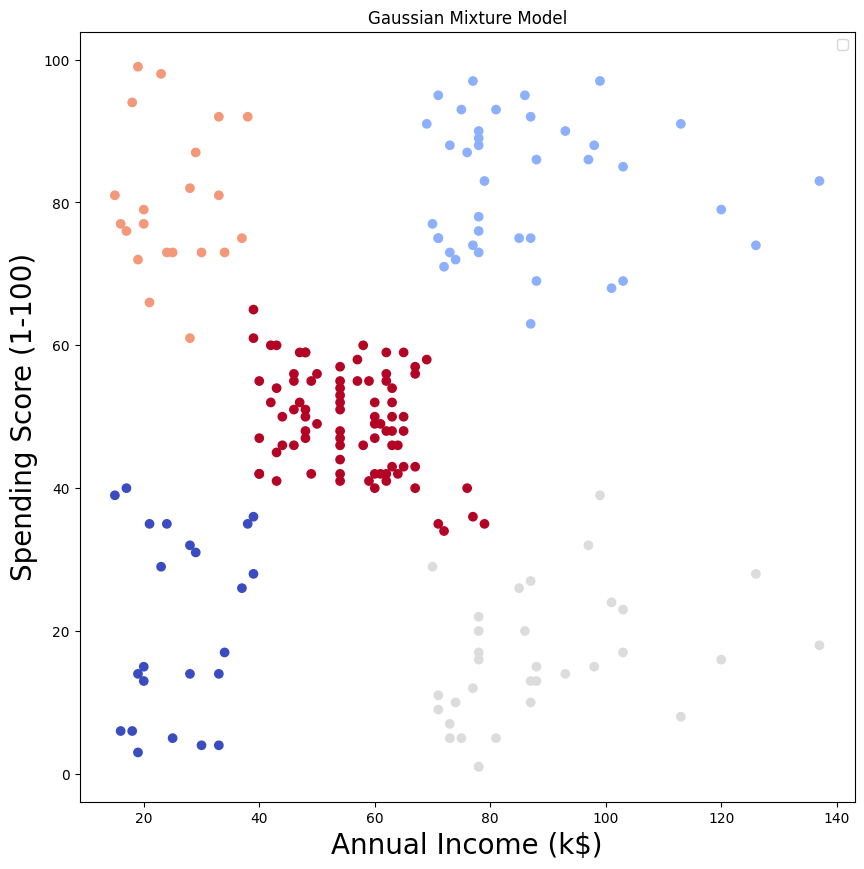

In [23]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X)
gmm_y_pred = gmm.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=gmm_y_pred, cmap='coolwarm')
plt.title("Gaussian Mixture Model")